## Imports
  Importing pandas, numpy, matplotlib,and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
 
**Read in the data.csv file as a DataFrame called df.** 
* Data.csv: Contains the contour points of phi(Ф) at Ф = 0.5, In this case it was generated through paraview.
* ε = 0.04  γ = 0.3

In [2]:
df = pd.DataFrame(pd.read_csv('data.csv'))
df.columns =[ 'x', 'y', 'z']
df

,x,y,z
0,-3.000000,-36.181110,1
1,-3.845589,-36.000000,1
2,-3.845589,-36.000000,-1
3,-2.000000,-36.336918,1
4,-2.000000,-36.336918,-1
...,...,...,...
578,1.000000,36.432671,-1
579,2.000000,36.336937,1
580,2.000000,36.336937,-1
581,3.000000,36.181129,1


## Ploting Raw Data
* Setting %matplotlib inline and ploting scatter plot of x and y from raw data
* comparing this plot with another plot for ε = 0 γ = 0.3

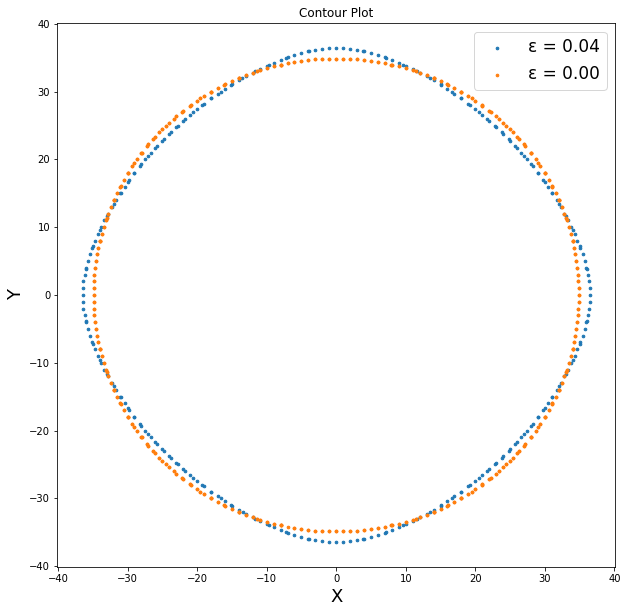

In [12]:
df2 = pd.DataFrame(pd.read_csv('data2.csv')) # data for ε = 0 γ = 0.3
df2.columns =[ 'x', 'y', 'z']

%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(df['x'],df['y'],s=7)
plt.scatter(df2['x'],df2['y'],s=7)
plt.xlabel('X', fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.title('Contour Plot')
plt.legend(['ε = 0.04','ε = 0.00'],fontsize = 17)
plt.show()

## Calculation of Radial diatance
 

In [13]:
df['Theta'] = np.degrees(np.arctan2(df['y'],df['x'])) # Calculating angle for every data points. Θ ∈ [-180 ,+180]
df['Theta'] = (df['Theta'] + 360) % 360  # Transforming Θ values as  Θ ∈ [0 ,360]
df['R_Theta'] = np.sqrt(df['x']**2  + df['y']**2) #Calculating radial distance
df

,x,y,z,Theta,R_Theta
291,36.465134,-3.571716e-16,1,0.000000,36.465134
295,36.432671,1.000000e+00,1,1.572254,36.446392
299,36.336937,2.000000e+00,1,3.150405,36.391936
303,36.181129,3.000000e+00,1,4.739903,36.305291
311,36.000000,3.845703e+00,1,6.097502,36.204826
...,...,...,...,...,...
271,35.966343,-4.000000e+00,1,353.653924,36.188090
277,36.000000,-3.845794e+00,1,353.902354,36.204836
280,36.181149,-3.000000e+00,1,355.260100,36.305310
283,36.336945,-2.000000e+00,1,356.849596,36.391943


## Sorting and Removing duplicate values
* In order to interpolate data using sciPy, the input data should be in ascending order and there shouldn't be any duplicate values

In [5]:
df = df.loc[df['z'] == 1].drop_duplicates(subset='Theta') #droping all values where z=-1 and duplicate values
df =df.sort_values(by='Theta',ascending=True) #Sorting data
df

,x,y,z,Theta,R_Theta
291,36.465134,-3.571716e-16,1,0.000000,36.465134
295,36.432671,1.000000e+00,1,1.572254,36.446392
299,36.336937,2.000000e+00,1,3.150405,36.391936
303,36.181129,3.000000e+00,1,4.739903,36.305291
311,36.000000,3.845703e+00,1,6.097502,36.204826
...,...,...,...,...,...
271,35.966343,-4.000000e+00,1,353.653924,36.188090
277,36.000000,-3.845794e+00,1,353.902354,36.204836
280,36.181149,-3.000000e+00,1,355.260100,36.305310
283,36.336945,-2.000000e+00,1,356.849596,36.391943


## Interpolation
* Creating a function **get_r**  for interpolating radial distance using polar coordinates data
[Theta	R_Theta]

In [6]:
from scipy import interpolate

def get_r(x):
    x_points = df['Theta']
    y_points = df['R_Theta']

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)


## Output
* Creating output DataFrame which contains radial distance at every 5 degree.

In [7]:
outputdf = pd.DataFrame({"E":[0.04], "Gamma":[0.3]}) 

for i in np.arange(0,359,5):
    new_col = 'Theta' + np.str(i) 
    outputdf[new_col] = np.str(get_r(i))
    
    
outputdf

,E,Gamma,Theta0,Theta5,Theta10,Theta15,Theta20,Theta25,Theta30,Theta35,...,Theta310,Theta315,Theta320,Theta325,Theta330,Theta335,Theta340,Theta345,Theta350,Theta355
0,0.04,0.3,36.465133666992216,36.28664152052239,35.883355060501515,35.4123846845827,34.95350272332226,34.55913212144095,34.228998415790215,33.99185816107896,...,33.845198829503154,33.79644475391392,33.8451938083047,33.99197042120094,34.22909969596815,34.559218366526615,34.95357108809658,35.41243599224849,35.88338687714277,36.28660575082618


### Saving output File

In [8]:
outputdf.to_csv('outputdata.csv')